# Kinematic sample
This notebook compiles data from lenses with imaging data and integrated velocity dispersion measurements.

Author: Simon Birrer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn

save_figures = False

In [2]:
def Jorgesen(sigma_ap, r_ap, r_eff):
    return sigma_ap / (10**(-0.065*np.log10(r_ap/(r_eff/2))-0.013*(np.log10(r_ap/(r_eff/2)))**2))

    
def rectangular_apature(x,y):
    return 1.025*np.sqrt(x*y/np.pi)

In [3]:
z_dict = {}
sigma_v_dict = {}
slit_dict = {}
width_dict = {}


dinos_df = pd.read_csv('Data/dinos_spectra.csv')


for index, row in dinos_df .iterrows():
    z_dict[row['name']] =  row['z_lens']
    slit_dict[row['name']] =  row['slit']
    width_dict[row['name']] =  row['width']
    if  row['sigma_v'] > 0:
        sigma_v_dict[row['name']] =  row['sigma_v']
    else:
        sigma_v_dict[row['name']] =  np.NaN
    


In [4]:
slacs_mass = pd.read_csv('Data/SLACS_mass_params.csv')
slacs_light = pd.read_csv('Data/SLACS_light_params.csv')
slacs = pd.merge(slacs_mass , slacs_light,left_on="Lens_name",right_on="lens_name") 
slacs['sigma_v'] = slacs['Lens_name'].map(sigma_v_dict) 
slacs['sigma_app'] = Jorgesen(slacs['sigma_v'], 1.5, slacs['r_eff'])
slacs['survey'] = 'SLACS'

sl2s_mass = pd.read_csv('Data/SL2S_mass_params.csv')
sl2s_light = pd.read_csv('Data/SL2S_light_params.csv')
sl2s = pd.merge(sl2s_mass , sl2s_light,left_on="Lens_name",right_on="lens_name") 
sl2s['sigma_v'] = sl2s['Lens_name'].map(sigma_v_dict) 
sl2s['slit'] = sl2s['Lens_name'].map(slit_dict) 
sl2s['width'] = sl2s['Lens_name'].map(width_dict) 
sl2s['sigma_app'] = Jorgesen(sl2s['sigma_v'], rectangular_apature(sl2s['slit'], sl2s['width']), sl2s['r_eff'])
sl2s['survey'] = 'SL2S'

bells_mass = pd.read_csv('Data/BELLS_mass_params.csv')
bells_light = pd.read_csv('Data/BELLS_light_params.csv')
bells = pd.merge(bells_mass , bells_light,left_on="Lens_name",right_on="lens_name") 
bells['sigma_v'] = bells['Lens_name'].map(sigma_v_dict) 
bells['sigma_app'] = Jorgesen(bells['sigma_v'], 1.0, slacs['r_eff'])
bells['survey'] = 'BELLS'


result = pd.concat([slacs,sl2s,bells])

In [5]:
import matplotlib as mpl

# for MNRAS
mpl.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid, make_axes_locatable
import matplotlib.image as mpimg
import seaborn as sns
import coloripy as cp

# to change tex to Times New Roman in mpl
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['mathtext.it'] = 'serif:italic'
plt.rcParams['mathtext.bf'] = 'serif:bold'
plt.rcParams['mathtext.fontset'] = 'custom'


#sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'})
#sns.set(style='ticks', context='paper', font='Times New Roman', font_scale=2.)
#sns.set_context('talk')
sns.set_style({'axes.facecolor': 'white',"xtick.direction": "in","ytick.direction": "in", "axes.linewidth": 2.0,})
#sns.set_palette('Set2')

cmap = sns.cubehelix_palette(start=0.5, rot=-1.5, gamma=1, hue=1, light=-.6, dark=0.8, reverse=False, as_cmap=True)
cmap2 = sns.cubehelix_palette(start=0.5, rot=-1.5, gamma=1, hue=1, light=-.2, dark=1., reverse=False, as_cmap=True)

msh_cmap = cp.get_msh_cmap(num_bins=501, rescale='power', power=2.5)

In [6]:
result['z_lens'] = result['Lens_name'].map(z_dict) 

In [7]:
palette = {'SLACS':'#7570b3','SL2S':'#d95f02','BELLS':'#1b9e77'}


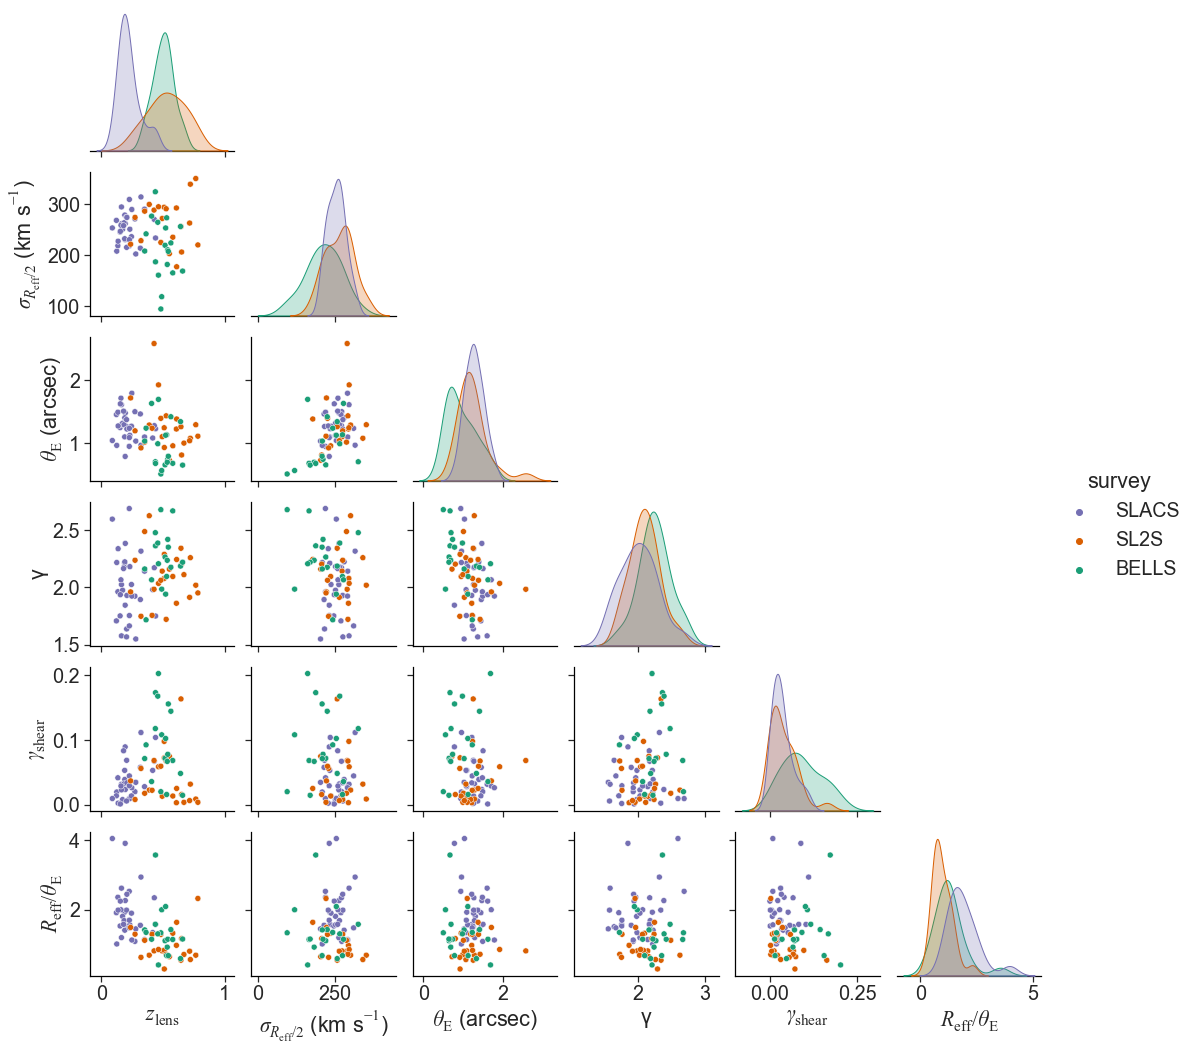

In [9]:
result[r'$z_{\rm lens}$'] = result['z_lens']
result[r'$R_{\rm eff}$ (arcsec)'] = result['r_eff']
result[r'$\theta_{\rm E}$ (arcsec)'] = result['R_Ein']
result[r'$\gamma_{\rm shear}$'] = result['γ ext']
result[r'$R_{\rm eff}/\theta_{\rm E}$'] = result['r_eff']/result['R_Ein']
result[r'$\sigma_{R_{\rm eff}/2}$ (km s$^{-1}$)'] = result['sigma_app']
result['Lens Name'] = result['Lens_name']




sns.set(font_scale=1.8)
sns.set_style('white', {'axes.linewidth': 2, 'axes.edgecolor':'black'})
#plt.rcParams['xtick.major.size'] = 20
#plt.rcParams['xtick.major.width'] = 4
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True


cur = result[['Lens Name','survey',r'$z_{\rm lens}$', r'$\sigma_{R_{\rm eff}/2}$ (km s$^{-1}$)',
                         r'$\theta_{\rm E}$ (arcsec)','γ',r'$\gamma_{\rm shear}$',
                     r'$R_{\rm eff}/\theta_{\rm E}$']].set_index('Lens Name')

b = sns.pairplot(cur,
             corner=True, hue="survey",palette=palette,
            diag_kws=dict(common_norm=False))
#sns.move_legend(b, "center right", bbox_to_anchor=(0.8, 0.7), title='', frameon=True)
#b.tick_params(labelsize=5)
